In [1]:
import openturns as ot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from shapley import ShapleyIndices
from shapley.tests import ProductGaussian, AdditiveGaussian
from shapley.plots import set_style_paper, plot_sensitivity_results, plot_error, plot_var, plot_cover

%load_ext autoreload
%autoreload 2

%matplotlib inline

set_style_paper()

savefigs = True

In [2]:
dim = 3
corr = 0.

beta = None
model = AdditiveGaussian(dim=dim, beta=beta)
model.margins = [ot.Normal()]*(dim-1) + [ot.Normal(0, 2.)]
theta = [0., 0., corr]
model.copula_parameters = theta
    
true_results = {
    'Shapley': model.shapley_indices,
    'First Sobol': model.first_sobol_indices,
    'Total Sobol': model.total_sobol_indices
}

In [3]:
n_var = 10000
n_outer = 1

n_boot = 500
n_run = 100

n_n_ticks = 30
min_n_ticks = 108
max_n_ticks = 3000

all_n_ticks = np.logspace(np.log10(min_n_ticks), np.log10(max_n_ticks), n_n_ticks, base=10, dtype=int)
all_n_ticks = np.unique(all_n_ticks)
n_n_ticks = len(all_n_ticks)
    
all_n_axes = [3, 9, 18]
n_n_axes = len(all_n_axes)
method = 'random'

In [4]:
%%time

np.random.seed(69)

all_shapley_results = np.zeros((n_n_ticks, n_n_axes, n_run, dim, n_boot))
all_first_results = np.zeros((n_n_ticks, n_n_axes, n_run, dim, n_boot))
all_total_results = np.zeros((n_n_ticks, n_n_axes, n_run, dim, n_boot))

all_shapley_results_SE = np.zeros((n_n_ticks, n_n_axes, n_run, dim))
all_first_results_SE = np.zeros((n_n_ticks, n_n_axes, n_run, dim))
all_total_results_SE = np.zeros((n_n_ticks, n_n_axes, n_run, dim))

for i_ticks, n_ticks in enumerate(all_n_ticks):
    for i_axes, n_axes in enumerate(all_n_axes):
        n_inner = n_axes
        n_perms = int(n_ticks / (n_inner * n_outer))
        
        print('n_inner:', n_inner, 'n_perms:', n_perms)
        for i_run in range(n_run):            
            shapley = ShapleyIndices(model.input_distribution)
            shapley.build_sample(model=model, n_perms=n_perms, n_var=n_var, n_outer=int(n_outer), n_inner=int(n_inner))
            shapley_results = shapley.compute_indices(n_boot=n_boot)
            
            all_shapley_results[i_ticks, i_axes, i_run] = shapley_results.full_shapley_indices
            all_first_results[i_ticks, i_axes, i_run] = shapley_results.full_first_indices
            all_total_results[i_ticks, i_axes, i_run] = shapley_results.full_total_indices
            
            all_shapley_results_SE[i_ticks, i_axes, i_run] = shapley_results.shapley_indices_SE
            all_first_results_SE[i_ticks, i_axes, i_run] = shapley_results.first_indices
            all_total_results_SE[i_ticks, i_axes, i_run] = shapley_results.total_indices_SE

n_inner: 3 n_perms: 36


/users/home/benoumechia/git-repo/shapley-indices/shapley/shapley.py:367: RuntimeWarning: invalid value encountered in true_divide
  vsob = first_indices / N_first / output_variance
/users/home/benoumechia/git-repo/shapley-indices/shapley/shapley.py:366: RuntimeWarning: invalid value encountered in true_divide
  total_indices = total_indices / N_total / output_variance


n_inner: 9 n_perms: 12


/users/home/benoumechia/git-repo/shapley-indices/shapley/shapley.py:375: RuntimeWarning: invalid value encountered in true_divide
  vsob_2 = first_indices_2 / N_first_2 / output_variance_2**2
/users/home/benoumechia/git-repo/shapley-indices/shapley/shapley.py:373: RuntimeWarning: invalid value encountered in true_divide
  total_indices_2 = total_indices_2 / N_total_2 / output_variance_2**2


n_inner: 18 n_perms: 6
n_inner: 3 n_perms: 40
n_inner: 9 n_perms: 13
n_inner: 18 n_perms: 6
n_inner: 3 n_perms: 45
n_inner: 9 n_perms: 15
n_inner: 18 n_perms: 7
n_inner: 3 n_perms: 50
n_inner: 9 n_perms: 16
n_inner: 18 n_perms: 8
n_inner: 3 n_perms: 56
n_inner: 9 n_perms: 18
n_inner: 18 n_perms: 9
n_inner: 3 n_perms: 63
n_inner: 9 n_perms: 21
n_inner: 18 n_perms: 10
n_inner: 3 n_perms: 71
n_inner: 9 n_perms: 23
n_inner: 18 n_perms: 11
n_inner: 3 n_perms: 80
n_inner: 9 n_perms: 26
n_inner: 18 n_perms: 13
n_inner: 3 n_perms: 90
n_inner: 9 n_perms: 30
n_inner: 18 n_perms: 15
n_inner: 3 n_perms: 101
n_inner: 9 n_perms: 33
n_inner: 18 n_perms: 16
n_inner: 3 n_perms: 113
n_inner: 9 n_perms: 37
n_inner: 18 n_perms: 18
n_inner: 3 n_perms: 127
n_inner: 9 n_perms: 42
n_inner: 18 n_perms: 21
n_inner: 3 n_perms: 142
n_inner: 9 n_perms: 47
n_inner: 18 n_perms: 23
n_inner: 3 n_perms: 159
n_inner: 9 n_perms: 53
n_inner: 18 n_perms: 26
n_inner: 3 n_perms: 179
n_inner: 9 n_perms: 59
n_inner: 18 n_perms

/users/home/benoumechia/git-repo/shapley-indices/shapley/plots.py:326: RuntimeWarning: invalid value encountered in less_equal
  z_0 = stats.norm.ppf((boot_estimation <= no_boot_estimation[:, :, :, np.newaxis]).mean(axis=-1))
/users/home/benoumechia/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/users/home/benoumechia/git-repo/shapley-indices/shapley/plots.py:348: RuntimeWarning: invalid value encountered in less
  cover = ((ci_down < true_indices.reshape(1, 1, dim)) & (ci_up > true_indices.reshape(1, 1, dim))).mean(axis=1)
/users/home/benoumechia/git-repo/shapley-indices/shapley/plots.py:348: RuntimeWarning: invalid value encountered in greater
  cover = ((ci_down < true_indices.reshape(1, 1, dim)) & (ci_up > true_indices.reshape(1, 1, dim))).mean(axis=1)


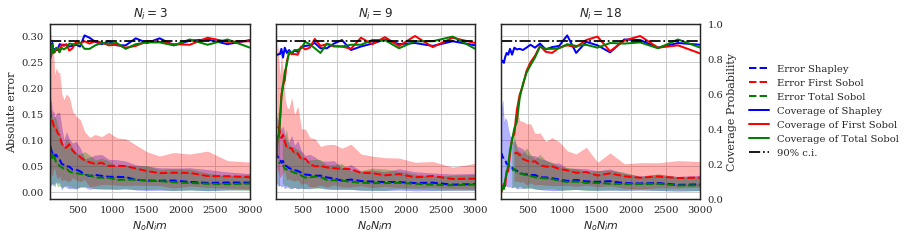

In [6]:
# Coverage probability
ci_prob = 0.10
error_type = 'absolute'
logscale = False
name = 'N_o N_i m'
savefigs = True
ci_method = 'bootstrap'

do_cover = False
if n_boot > 1 or method == 'random':
    do_cover = True

if name == 'N_i':
    x_ticks = all_n_inner
    x_axes = all_n_outer
    name_axes = 'N_o'
    axis = 0
elif name == 'N_o':
    x_ticks = all_n_outer
    x_axes = all_n_inner
    name_axes = 'N_i'
    axis = 1
elif name == 'N_o N_i':
    x_ticks = all_n_ticks
    x_axes = all_n_axes
    name_axes = 'N_i'
    axis = 1
elif name == 'N_o N_i m':
    x_ticks = all_n_ticks
    x_axes = all_n_axes
    name_axes = 'N_i'
    axis = 1

n_col = len(x_axes)
fig, axes = plt.subplots(1, n_col, figsize=(2.5*n_col+3, 3.5), sharex=True, sharey=True) 
    
axes = [axes] if n_col == 1 else axes

for i_ax, (N, ax_err) in enumerate(zip(x_axes, axes)):
    
    # Chose the associated result
    results = {
        'Shapley': all_shapley_results.take(i_ax, axis=axis),
        'First Sobol': all_first_results.take(i_ax, axis=axis),
        'Total Sobol': all_total_results.take(i_ax, axis=axis)
    }
    
    results_SE = {
        'Shapley': all_shapley_results_SE.take(i_ax, axis=axis),
        'First Sobol': all_first_results_SE.take(i_ax, axis=axis),
        'Total Sobol': all_total_results_SE.take(i_ax, axis=axis)
    }
            
    plot_error(results, true_results, x_ticks, ax=ax_err, error_type=error_type, logscale=logscale)

    ax_cov = ax_err.twinx()
    ax_cov.set_ylim(0., 1.)
    if do_cover:
        plot_cover(results, true_results, x_ticks, results_SE=results_SE, ax=ax_cov, ci_prob=ci_prob,
                  ci_method=ci_method)
        if i_ax < n_col - 1:
            plt.setp(ax_cov.get_yticklabels(), visible=False)
            ax_cov.set_ylabel('')
            ax_cov.set_yticks([])
            
    if i_ax > 0:
        plt.setp(ax_err.get_yticklabels(), visible=False)
        ax_err.set_ylabel('')
        
    ax_err.set_xlabel('$%s$' % (name))
    ax_err.grid()
    ax_err.set_title('$%s = %d$' % (name_axes, N))
    
    if i_ax == n_col-1:
        h_err, l_err = ax_err.get_legend_handles_labels()
        h_cov, l_cov = ax_cov.get_legend_handles_labels()
        ax_err.legend(h_err + h_cov, l_err + l_cov, loc='center left', 
                          bbox_to_anchor=(1.2, 0.5))

fig.tight_layout()
if savefigs:
    figname = './output/additive_gaussian_precision_dim_%d_%s_nboot_%d' % (dim, method, n_boot)
    figname += '%s_%s' % (name, ci_method)
    figname += '_n_ticks_%d_n_naxes_%d_rho_%.2f_Nv_%d_maxNticks_%d_nrun_%d_%s' %\
        (n_n_ticks, n_n_axes, corr, n_var, max_n_ticks, n_run, error_type)
    fig.savefig(figname + '.pdf', bbox_inches='tight')
    fig.savefig(figname + '.png', bbox_inches='tight')